In [11]:
#Importing Libraries
import tweepy
from tweepy import OAuthHandler 
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import json
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
class TwitterClient(object): 
    ''' 
    Generic Twitter Class for sentiment analysis. 
    '''
    def __init__(self):
        consumer_key = 'vGTyncYaXuFM68Ggmy5vcXzVF'
        consumer_secret = 'GSiJRQ0ULDXJ41NiYvY32A8t9jUMNl0utjuMUUseYTEN6YIzRV'
        access_token = '1683551898-ChxwaVD6c2lOiTE0TlsmonfcnDZaGYa2KC9m2Pe'
        access_token_secret = 'niLRLMthcLprBl0bALnEyavikRuICZ8LKD4Xg4tzZyeQM'
  
        # attempt authentication 
        try: 
            # create OAuthHandler object 
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            self.auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            self.api = tweepy.API(self.auth) 
        except: 
            print("Error: Authentication Failed") 
  
    def clean_tweet(self, tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 
  
    def get_tweet_sentiment(self, tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(self.clean_tweet(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
  
    def get_tweets(self, query, count = 10): 
        ''' 
        Main function to fetch tweets and parse them. 
        '''
        # empty list to store parsed tweets 
        tweets = [] 
  
        try: 
            # call twitter api to fetch tweets 
            fetched_tweets = self.api.search(q = query, count = count) 
  
            # parsing tweets one by one 
            for tweet in fetched_tweets: 
                # empty dictionary to store required params of a tweet 
                parsed_tweet = {} 
  
                # saving text of tweet 
                parsed_tweet['text'] = tweet.text 
                # saving sentiment of tweet 
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 
  
                # appending parsed tweet to tweets list 
                if tweet.retweet_count > 0: 
                    # if tweet has retweets, ensure that it is appended only once 
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 
  
            # return parsed tweets 
            return tweets 
  
        except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error : " + str(e)) 
  
def main(): 
    # creating object of TwitterClient Class 
    api = TwitterClient() 
    # calling function to get tweets 
    tweets = api.get_tweets(query = 'corona', count = 200) 
  
    # picking positive tweets from tweets 
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
    # percentage of positive tweets 
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
    # picking negative tweets from tweets 
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
    # percentage of negative tweets 
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 
    # percentage of neutral tweets 
    print("Neutral tweets percentage: {} % \ ".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets))) 
  
    # printing first 5 positive tweets 
    print("\n\nPositive tweets:") 
    for tweet in ptweets[:10]: 
        print(tweet['text']) 
  
    # printing first 5 negative tweets 
    print("\n\nNegative tweets:") 
    for tweet in ntweets[:10]: 
        print(tweet['text']) 
  
if __name__ == "__main__": 
    # calling main function 
    main() 


Positive tweets percentage: 21.348314606741575 %
Negative tweets percentage: 7.865168539325842 %
Neutral tweets percentage: 70.78651685393258 % \ 


Positive tweets:
RT @Tiff_FitzHenry: Yes, there is a virus ravaging humanity, but it’s not corona.

It is the institutionalized sexual abuse of children.…
@ChampionMtager @RepThomasMassie So does anyone have an accurate count as to how many individuals have had the Corona virus?
@emmanuel_tag @WHO @DrTedros Why we letting communist destroy our lives again? The world could be corona free without the WHO covering CCP.
@julianoroes Se não fosse o corona o convite para uma xícara de café seria real eu acredito
RT @Lil55st: Corona been good to me idgaf about this shut down😂😂😂 Better turn that grind up!!
@TMobile @Tesla I would go on a nice little road trip where to depends on the current state of Corona. I've wanted… https://t.co/F7RV2TstNk
@sardesairajdeep We are in better position in Corona compare to USA  .
RT @keef_n_beef: Zoom Into Me (Alt

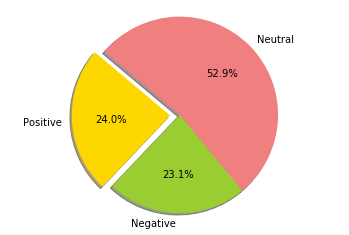

In [17]:
labels = 'Positive', 'Negative', 'Neutral'

colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()